In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.collocations import BigramCollocationFinder as bigram_collocation
from nltk.collocations import TrigramCollocationFinder as trigram_collocation
from nltk.metrics import BigramAssocMeasures
from nltk.metrics import TrigramAssocMeasures
from nltk import corpus
import nltk
from statistics import mean

In [3]:
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_selection import chi2
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

In [4]:
df = pd.read_csv('../preprocessed_dataset.csv')
df.head()

,Title,Artist,Featuring,Featured_Artist,Lyrics,Tags,Genre
0,Bridge Over Troubled Water,Simon & Garfunkel,0,Simon & Garfunkel,youre weary feel small tear eye dry im side ti...,"folk,classic rock,oldies",rock
1,American Woman,The Guess Who,0,The Guess Who,american woman gon na mess mind american woman...,"classic rock,70s,rock",rock
2,War,Edwin Starr,0,Edwin Starr,war huh yeah ! good absolutely nothing uhuh wa...,"r&b,r&b,motown",r&b
3,Ain't No Mountain High Enough,Diana Ross,0,Diana Ross,need call matter matter far call name ill hurr...,"r&b,motown,70s",r&b
4,I'll Be There,The Jackson 5,0,The Jackson 5,must make pact must bring salvation back love ...,"motown,r&b,70s",r&b


In [5]:
bigram_score = []
for i in range(len(df.index)):
    mean_pmi = 0.0
    pmi_bigram = []
    text = df["Lyrics"][i].split()
    coll_bia=bigram_collocation.from_words(text)
    coll_bia.apply_freq_filter(3)
    bigram_freq = coll_bia.ngram_fd.items()
    bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
#     coll_bia=bigram_collocation.from_words(text)
#     coll_bia.apply_freq_filter(2)
#     bigramPMITable = pd.DataFrame(list(coll_bia.score_ngrams(BigramAssocMeasures.pmi)), columns=['bigram','PMI']).sort_values(by='PMI', ascending=False)
#     bigramPMITable
#     if len(bigramPMITable.index.values) != 0:
#         mean_pmi=mean(bigramPMITable["PMI"])
    if len(bigramFreqTable.index.values) != 0:
        mean_pmi=mean(bigramFreqTable["freq"])
    bigram_score.append(mean_pmi)

In [6]:
trigram_score = []
for i in range(len(df.index)):
    mean_pmi = 0.0
    pmi_trigram = []
    text = df["Lyrics"][i].split()
    coll_tri=trigram_collocation.from_words(text)
    coll_tri.apply_freq_filter(3)
    trigram_freq = coll_tri.ngram_fd.items()
    trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)
#     trigramPMITable = pd.DataFrame(list(coll_tri.score_ngrams(TrigramAssocMeasures.pmi)), columns=['trigram','PMI']).sort_values(by='PMI', ascending=False)
#     trigramPMITable
#     if len(trigramPMITable.index.values) != 0:
#         mean_pmi=mean(trigramPMITable["PMI"])
    if len(trigramFreqTable.index.values) != 0:
        mean_pmi=mean(trigramFreqTable["freq"])
    trigram_score.append(mean_pmi)

In [7]:
print(len(trigram_score))

5373


In [8]:
y_output = []
for item in df['Genre'] :
    if item == 'rock' : 
        y_output.append(0)
    elif item == 'r&b' :
        y_output.append(1)
    elif item == 'blues' :
        y_output.append(2)
    elif item == 'country' :
        y_output.append(3)
    elif item == 'edm' :
        y_output.append(4) 
    elif item == 'rap' :
        y_output.append(5)
    elif item == 'pop' :
        y_output.append(6)

In [9]:
X = df.iloc[:,4].values.astype('U')
d = {'Genre' : df['Genre'] , 'Lyrics' : X , 'Genre_ID' : y_output}
df2 = pd.DataFrame(data = d)

In [10]:
df2.head()

,Genre,Lyrics,Genre_ID
0,rock,youre weary feel small tear eye dry im side ti...,0
1,rock,american woman gon na mess mind american woman...,0
2,r&b,war huh yeah ! good absolutely nothing uhuh wa...,1
3,r&b,need call matter matter far call name ill hurr...,1
4,r&b,must make pact must bring salvation back love ...,1


In [11]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

In [12]:
d2 = {'Lyrics' : df['Lyrics'] , 'Bigram' : bigram_score , 'Trigram' : trigram_score}
df3 = pd.DataFrame(data = d2)
df3.head()

,Lyrics,Bigram,Trigram
0,youre weary feel small tear eye dry im side ti...,5.500000,5.333333
1,american woman gon na mess mind american woman...,5.208333,4.400000
2,war huh yeah ! good absolutely nothing uhuh wa...,5.166667,4.125000
3,need call matter matter far call name ill hurr...,3.636364,3.714286
4,must make pact must bring salvation back love ...,3.333333,3.000000


In [13]:
features = tfidf.fit_transform(df2.Lyrics).toarray()
print (features.shape)
features = np.column_stack((features,bigram_score,trigram_score))
scaler = preprocessing.MinMaxScaler()
features_scaled = scaler.fit_transform(features)

features_scaled

(5373, 27061)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.10679612,
        0.0969697 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.10113269,
        0.08      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.10032362,
        0.075     ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.0802589 ,
        0.06121212],
       [0.        , 0.        , 0.        , ..., 0.        , 0.08543689,
        0.06836364],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
labels = df2.Genre_ID
features_scaled.shape

(5373, 27063)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df2['Lyrics'], df2['Genre'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

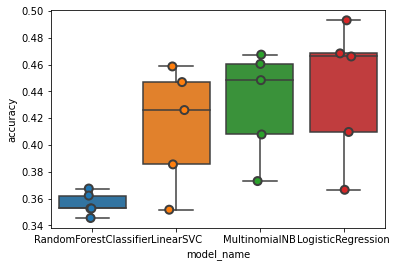

In [16]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(max_iter=5000),
    MultinomialNB(),
    LogisticRegression(random_state=0,max_iter=600),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features_scaled, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [17]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.413736
LogisticRegression        0.440721
MultinomialNB             0.431419
RandomForestClassifier    0.356039
Name: accuracy, dtype: float64

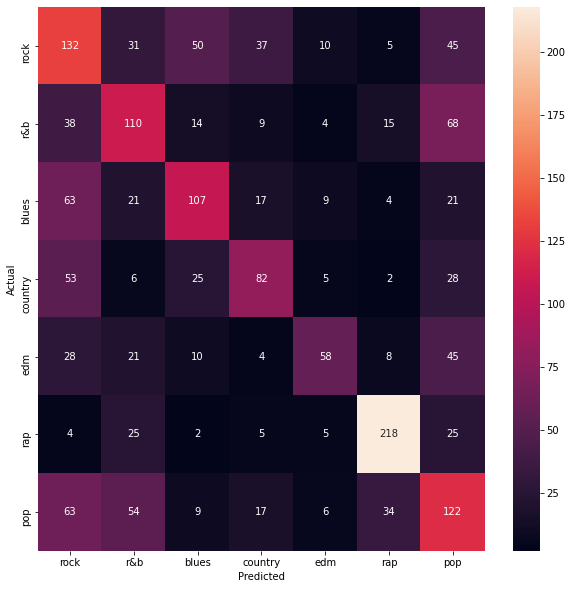

In [18]:
model = LogisticRegression(max_iter=600)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_scaled, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=list(df2['Genre'].drop_duplicates()), yticklabels=list(df2['Genre'].drop_duplicates()))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Genre'].unique()))

              precision    recall  f1-score   support

        rock       0.35      0.43      0.38       310
         r&b       0.41      0.43      0.42       258
       blues       0.49      0.44      0.47       242
     country       0.48      0.41      0.44       201
         edm       0.60      0.33      0.43       174
         rap       0.76      0.77      0.76       284
         pop       0.34      0.40      0.37       305

    accuracy                           0.47      1774
   macro avg       0.49      0.46      0.47      1774
weighted avg       0.48      0.47      0.47      1774

